# Введение в регрессионный анализ: интенсив по Python

*Алла Тамбовцева*

## Семинар 5. Операции с датафреймами Pandas: часть 3

In [1]:
import pandas as pd

В файле `выборы_ЦФО.csv` (скачать [здесь](https://github.com/allatambov/PyReg25/blob/main/%D0%B2%D1%8B%D0%B1%D0%BE%D1%80%D1%8B_%D0%A6%D0%A4%D0%9E.csv)) сохранены результаты выборов в Государственную Думу 8 созыва 2021 года в Центральном федеральном округе в разрезе территориальных избирательных комиссий (одна строка – одна комиссия). Переменные в файле:

* `region`: название региона;
* `tik`: название ТИК;
* `invalid`: число недействительных бюллетеней;
* `valid`: число действительных бюллетеней;

Далее – столбцы с числом голосов за партии:

* `КПРФ`: политическая партия "КОММУНИСТИЧЕСКАЯ ПАРТИЯ РОССИЙСКОЙ ФЕДЕРАЦИИ";
* `ЗЕЛЕНЫЕ`: политическая партия "Российская экологическая партия "ЗЕЛЁНЫЕ";
* `ЛДПР`: политическая партия ЛДПР – Либерально-демократическая партия России;
* `НЛ`: политическая партия "НОВЫЕ ЛЮДИ";
* `ЕР`: всероссийская политическая партия "ЕДИНАЯ РОССИЯ";
* `СР`: партия СПРАВЕДЛИВАЯ РОССИЯ – ЗА ПРАВДУ;
* `ЯБЛОКО`: политическая партия "Российская объединенная демократическая партия "ЯБЛОКО";
* `ПР`: всероссийская политическая партия "ПАРТИЯ РОСТА";
* `РПСС`: политическая партия РОССИЙСКАЯ ПАРТИЯ СВОБОДЫ И СПРАВЕДЛИВОСТИ;
* `КР`: политическая партия КОММУНИСТИЧЕСКАЯ ПАРТИЯ КОММУНИСТЫ РОССИИ;
* `ГП`: политическая партия "Гражданская Платформа";
* `ЗА`: политическая партия ЗЕЛЕНАЯ АЛЬТЕРНАТИВА;
* `РОДИНА`: "ВСЕРОССИЙСКАЯ ПОЛИТИЧЕСКАЯ ПАРТИЯ "РОДИНА".

Загрузите данные из файла и сохраните их в датафрейм `regs`.

In [2]:
regs = pd.read_csv("выборы_ЦФО.csv")

### Задача 1

Выведите «техническую» информацию о датафрейме: число строк и столбцов, типы столбцов и количество заполненных ячеек.

In [3]:
regs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694 entries, 0 to 693
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   region   694 non-null    object
 1   tik      694 non-null    object
 2   invalid  694 non-null    int64 
 3   valid    694 non-null    int64 
 4   КПРФ     694 non-null    int64 
 5   ЗЕЛЕНЫЕ  694 non-null    int64 
 6   ЛДПР     694 non-null    int64 
 7   НЛ       694 non-null    int64 
 8   ЕР       694 non-null    int64 
 9   СР       694 non-null    int64 
 10  ЯБЛОКО   694 non-null    int64 
 11  ПР       694 non-null    int64 
 12  РПСС     694 non-null    int64 
 13  КР       694 non-null    int64 
 14  ГП       694 non-null    int64 
 15  ЗА       694 non-null    int64 
 16  РОДИНА   694 non-null    int64 
dtypes: int64(15), object(2)
memory usage: 92.3+ KB


### Задача 2

Добавьте в датафрейм `regs` столбец `turnout` со значениями явки (сумма действительных и недействительных бюллетеней). Выведите максимальное значение по этому столбцу.

In [4]:
regs["turnout"] = regs["valid"] + regs["invalid"]
print(regs["turnout"].max())

196055


### Задача 3

Добавьте в датафрейм `regs` столбцы `ЕР%` и `КПРФ%` с процентами голосов за эти партии (число голосов делится на явку и домножается на 100, без округления). Выведите описательные статистики по этим столбцам. Чему равны минимальные значения процентов в каждом столбце?

In [5]:
regs["ЕР%"] = regs["ЕР"] / regs["turnout"] * 100
regs["КПРФ%"] = regs["КПРФ"] / regs["turnout"] * 100

print(regs["ЕР%"].describe()) # смотрим на min
print(regs["КПРФ%"].describe()) # смотрим на min

count    694.000000
mean      43.971845
std       14.667098
min       20.973752
25%       32.166219
50%       40.374436
75%       52.904177
max       88.516841
Name: ЕР%, dtype: float64
count    694.000000
mean      21.838823
std        6.511731
min        5.268320
25%       17.218803
50%       22.025217
75%       26.907391
max       36.919831
Name: КПРФ%, dtype: float64


### Задача 4

* Постройте гистограммы для столбцов `ЕР%` и `КПРФ%`. Можно ли считать распределения симметричными?
* Постройте ящики с усами для столбцов `ЕР%` и `КПРФ%`. Есть ли в областях районы с нетипичными значениями явки?

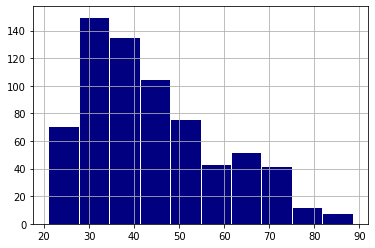

In [6]:
# не симмметрично, скошено вправо
regs["ЕР%"].hist(color = "navy", edgecolor = "white");

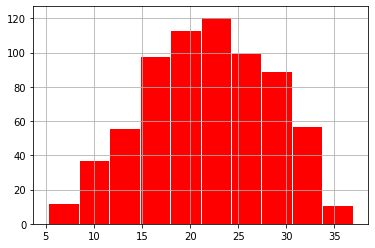

In [8]:
# не симмметрично, немного скошено влево
regs["КПРФ%"].hist(color = "red", edgecolor = "white");

<AxesSubplot:>

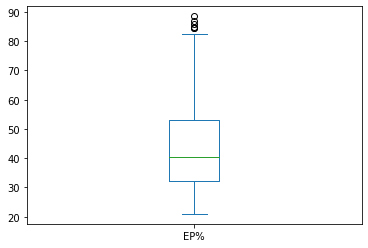

In [9]:
# есть выбросы – нетипично высокие значения
regs["ЕР%"].plot.box();

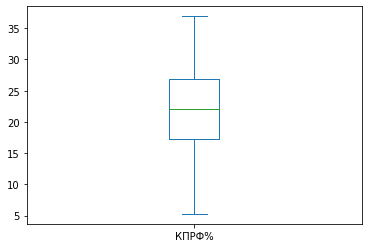

In [12]:
# нет выбросов
regs["КПРФ%"].plot.box();

### Задача 5

Вычислите количество ТИКов (ТИК – одна строка в датафрейме), где процент голосов за КПРФ не ниже, чем процент голосов за «Единую Россию».

In [13]:
# решение 1: отфильтровываем строки и считаем число строк через len()

len(regs[regs["КПРФ%"] >= regs["ЕР%"]])

91

In [14]:
# решение 2: проверяем условие и считаем True через суммирование

sum(regs["КПРФ%"] >= regs["ЕР%"])

91

### Задача 6

Выберите строки, соответствующие ТИКами, не относящимся к Москве, где процент голосов за КПРФ выше, чем за «Единую Россию».

In [ ]:
### YOUR CODE HERE ###

### Задача 7

Сгруппируйте строки в `regs` по названию региона и выведите все описательные статистики для:

* процента голосов за «Единую Россию»;
* процента голосов за КПРФ.

In [ ]:
### YOUR CODE HERE ###

### Задача 8

Если вы верно выполнили задачу №7, то для каждой из двух партий получили датафрейм, где по строкам – названия регионов, а по столбцам – описательные статистики. 

Сохраните датафреймы в переменные и отсортируйте строки по среднему значению (столбец `mean`) в порядке убывания.

In [ ]:
### YOUR CODE HERE ###